## Using Prophet Method in Time Series Analysis

📌 In this part, we will examine the use of the prophet method, which is one of the time series analysis methods.

# Business Problem

📌 In this section, we estimate the number of passengers in the coming years by examining the number of passengers in the past years.

# Dataset Story

📌 This dataset contains how many passengers traveled monthly from 1949 to 1960.

**Month**: the date in the month is a variable.

**Passengers**: estimates the number of passengers per month.

# Import Necessary Libraries

In [360]:
import warnings
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

warnings.filterwarnings("ignore")

# Import Dataset

In [361]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/AirPassengers.csv", index_col='Month', parse_dates=True)
df.rename({'#Passengers': 'Passengers'}, axis=1, inplace=True)
df.index.freq = 'MS'
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# General Information About to the Dataset

In [362]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [363]:
check_df(df)

######################### Head #########################
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
######################### Tail #########################
            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432
######################### Shape #########################
(144, 1)
######################### Types #########################
Passengers    int64
dtype: object
######################### NA #########################
Passengers    0
dtype: int64
######################### Qurtiles #########################
              count     mean      std      min       0%       5%      50%      95%      99%     100%      max
Passengers 144.0000 280.2986 119.9663 104.0000 104.0000 121.6000 265.5000 488.1500 585.7900 622.0000 622.0000


# Visualizing the Time Series Simply

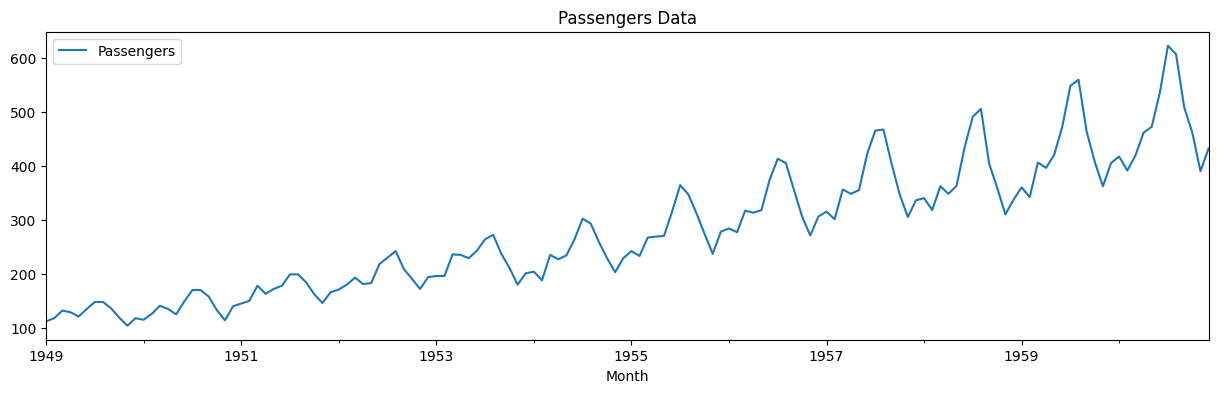

In [364]:
df[['Passengers']].plot(figsize=(15,4), title='Passengers Data')
plt.show()

# Time Series Structural Analysis

In [365]:
def ts_decompose(y, model="additive"):
    
    # Stationary Test: Dickey-Fuller
    # "HO: Non-stationary"
    # "H1: Stationary"
    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        is_istationary = (F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        is_istationary = (F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].set_title(is_istationary)
    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

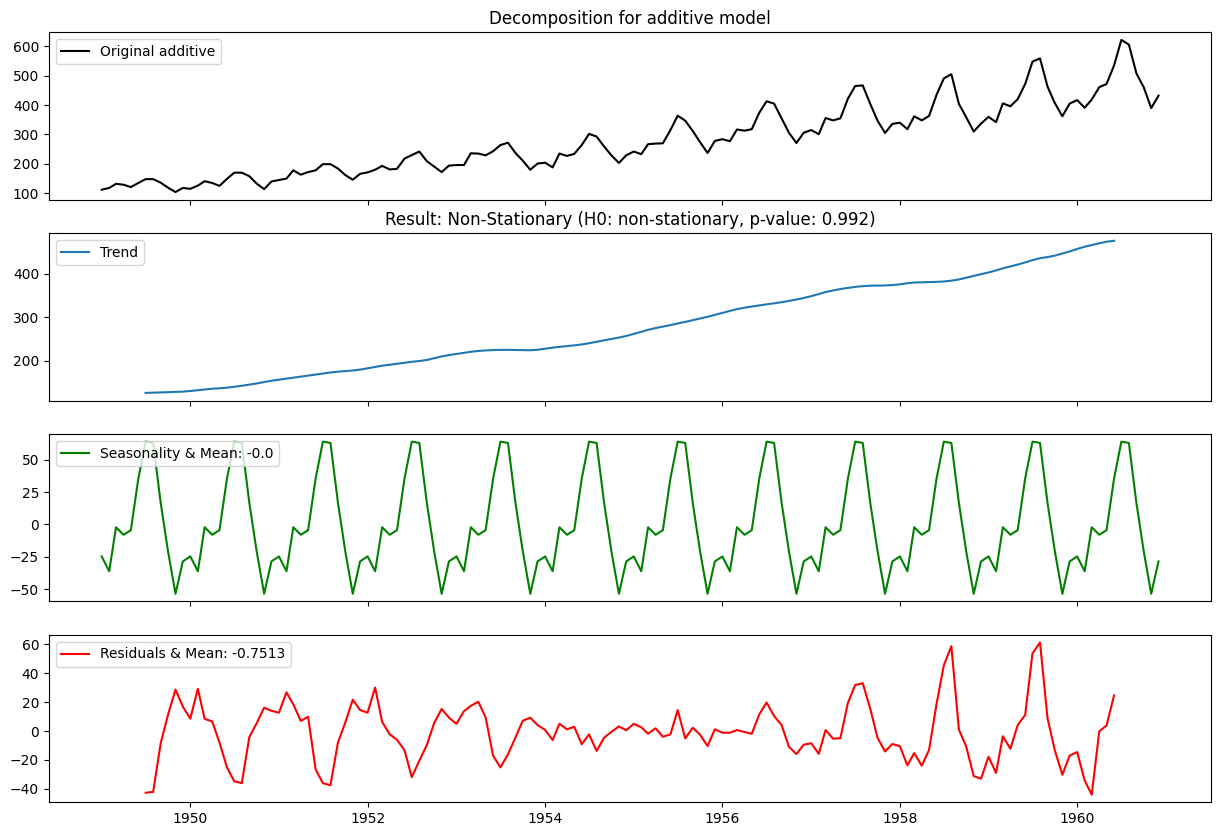

In [366]:
ts_decompose(df)

# Prophet Data Type Conversion

📌 The Prophet dataframe must have a specific format. The first column must have the name **ds** and contain the date-times. The second column should have the name **y** and contain the observations.

In [367]:
df = df.reset_index()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# Splitting the Dataset

In [368]:
# Using Holdut Method ===> Train: 120 Month and Test: 24 Month
split_index = 120
train = df[:split_index]
test = df[split_index:]
print((len(train), len(test)))

(120, 24)


# Create a Base Model Using Prophet

In [369]:
def create_prophet_model(train, test):
  model = Prophet()
  model.fit(train)
  forecast = model.predict(test)

  model.plot_components(forecast)
  plt.show()

  mae = mean_absolute_error(test['y'], forecast['yhat'])
  model.plot(forecast, figsize=(10,6))
  plt.title(f"MAE: {round(mae, 2)}")
  plt.show()

  forecast.index = forecast.index + split_index + 1
  plt.figure(figsize=(12,6))
  plt.plot(df['y'], label='Actual')
  plt.plot(forecast['yhat'], label='Predicted')
  plt.legend()
  plt.title("Comparison of Actual Results with Predicted Results")
  plt.show()

  return forecast

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


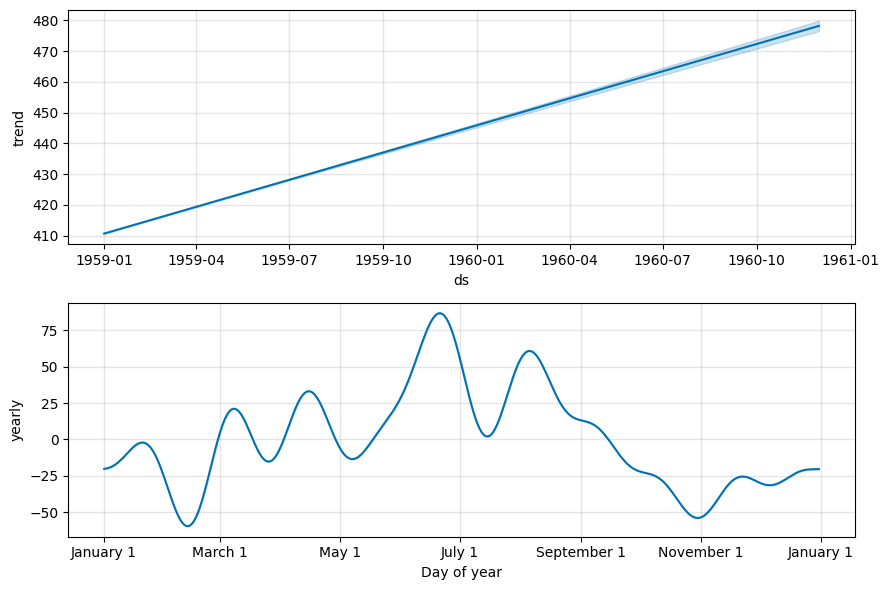

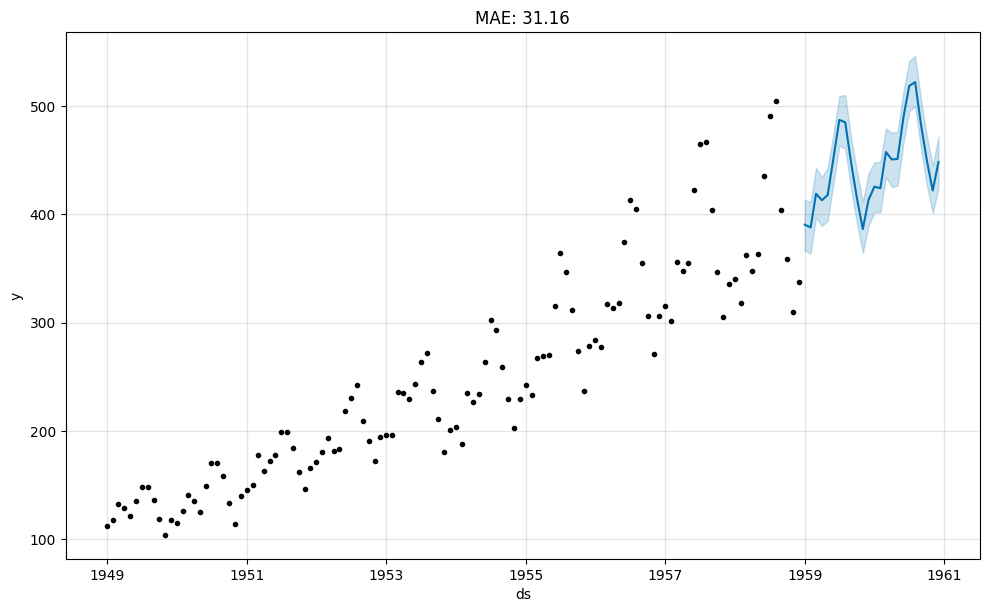

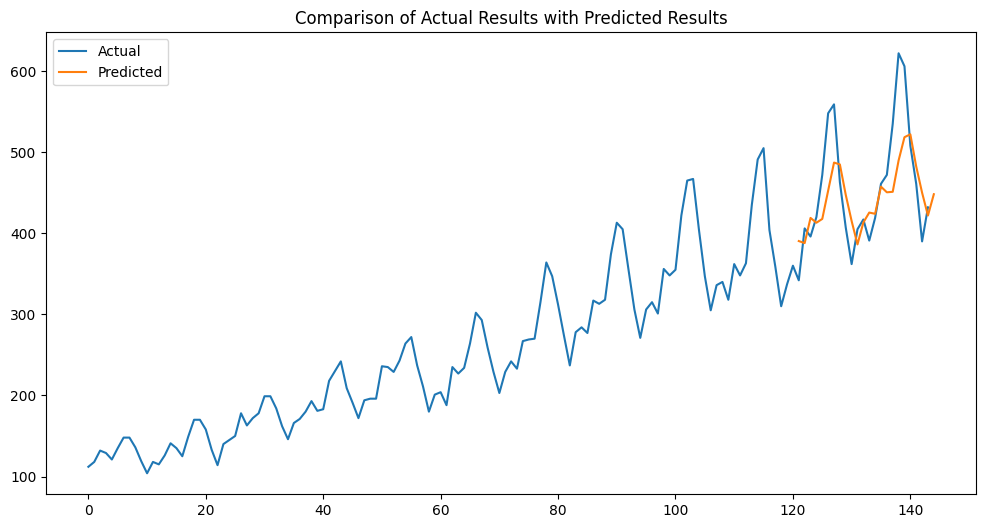

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
121,1959-01-01,410.6927,366.4435,413.3187,410.6927,410.6950,-20.2890,-20.2890,-20.2890,-20.2890,-20.2890,-20.2890,0.0000,0.0000,0.0000,390.4036
122,1959-02-01,413.6803,363.7547,411.4109,413.6612,413.7003,-25.7951,-25.7951,-25.7951,-25.7951,-25.7951,-25.7951,0.0000,0.0000,0.0000,387.8852
123,1959-03-01,416.3789,396.8854,442.7922,416.3294,416.4233,2.5531,2.5531,2.5531,2.5531,2.5531,2.5531,0.0000,0.0000,0.0000,418.9319
124,1959-04-01,419.3665,389.2140,434.1709,419.2798,419.4457,-6.3579,-6.3579,-6.3579,-6.3579,-6.3579,-6.3579,0.0000,0.0000,0.0000,413.0086
125,1959-05-01,422.2578,393.8189,442.8834,422.1345,422.3803,-4.5601,-4.5601,-4.5601,-4.5601,-4.5601,-4.5601,0.0000,0.0000,0.0000,417.6977
126,1959-06-01,425.2455,429.0698,474.9274,425.0769,425.4143,27.2907,27.2907,27.2907,27.2907,27.2907,27.2907,0.0000,0.0000,0.0000,452.5362
127,1959-07-01,428.1368,463.5856,509.2215,427.9191,428.3680,59.0653,59.0653,59.0653,59.0653,59.0653,59.0653,0.0000,0.0000,0.0000,487.2020
128,1959-08-01,431.1244,460.5177,510.1618,430.8457,431.4156,53.7558,53.7558,53.7558,53.7558,53.7558,53.7558,0.0000,0.0000,0.0000,484.8802
129,1959-09-01,434.1121,422.5943,470.4317,433.7702,434.4720,13.2693,13.2693,13.2693,13.2693,13.2693,13.2693,0.0000,0.0000,0.0000,447.3814
130,1959-10-01,437.0034,391.8981,440.2969,436.5890,437.4341,-21.8740,-21.8740,-21.8740,-21.8740,-21.8740,-21.8740,0.0000,0.0000,0.0000,415.1294


In [370]:
create_prophet_model(train, test)